<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/%20Week-11-ml-classification-cluster%20/K_means_clustering_for_more_organisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Tasks:

##Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

##In scikit-learn, import the Iris dataset, it is a great classic of data. It contains 3 species of flowers (irises) according to their length and width of petal and sepal.


In [ ]:
link = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

In [ ]:
df = pd.read_csv(link)
print(df.dtypes)
df.sample(5)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
46,5.1,3.8,1.6,0.2,setosa
64,5.6,2.9,3.6,1.3,versicolor


##Train your model to find 3 clusters, from the 4 numeric columns.


In [ ]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, random_state=1)

X = df.drop('species', axis=1)
y = df['species']

X_scaled = scaler.fit_transform(X)

kmeans.fit(X_scaled)

cats = kmeans.predict(X_scaled)

df['kmeans'] = cats

In [ ]:
print(df.kmeans.value_counts())
df.sample(5)

1    53
0    50
2    47
Name: kmeans, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species,kmeans
40,5.0,3.5,1.3,0.3,setosa,0
134,6.1,2.6,5.6,1.4,virginica,1
14,5.8,4.0,1.2,0.2,setosa,0
149,5.9,3.0,5.1,1.8,virginica,1
96,5.7,2.9,4.2,1.3,versicolor,1


##Produce a visualization comparing the basic dataset with the classes generated by the K-means using this image as inspiration. You can display 2 features of your choice among the 4.  
On the graph on the left, you have to display the points with different colors for each cluster you belong to, as well as the center of each cluster prominently.  
On the right graph, you must display the points with different colors corresponding to their iris species.

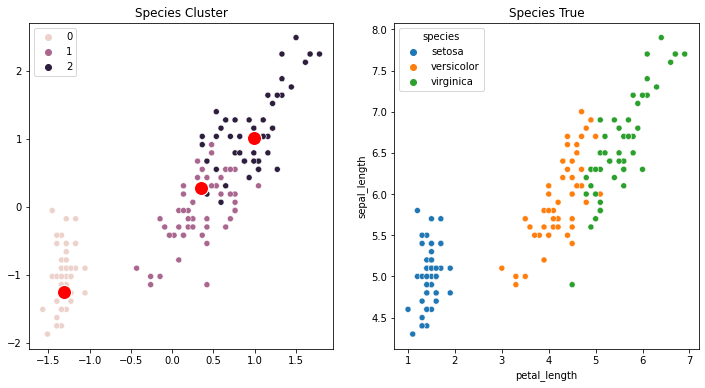

In [ ]:
a,b,c,d = 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
centers = kmeans.cluster_centers_

X_center = centers[:,2]
y_center = centers[:,3]


f, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x= X_scaled[:,2], y=X_scaled[:,0], hue=kmeans.labels_, ax=axes[0]).set_title('Species Cluster')
sns.scatterplot(x=X_center, y=y_center, s=200, marker="o", ax=axes[0], color='r')
sns.scatterplot(data=df, x=c, y=a, hue='species', ax=axes[1]).set_title('Species True')
plt.show()

##Draw another model with 2 clusters, then displays the same graphs
##Same for 4 clusters

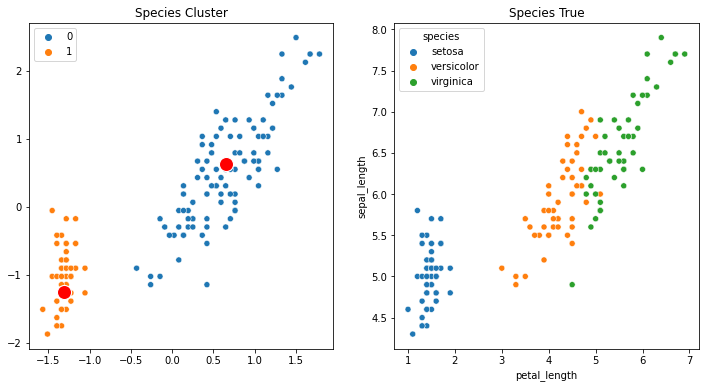

In [ ]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, random_state=1)
X = df.drop('species', axis=1)
y = df['species']
X_scaled = scaler.fit_transform(X)
kmeans.fit(X_scaled)
cats = kmeans.predict(X_scaled)
df['kmeans'] = cats

a,b,c,d = 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
centers = kmeans.cluster_centers_

X_center = centers[:,2]
y_center = centers[:,3]


f, axes = plt.subplots(1, 2, figsize=(12, 6))
#sns.scatterplot(data=df, x=, y=a, hue='kmeans', ax=axes[0]).set_title('Species Cluster')
sns.scatterplot(x= X_scaled[:,2], y=X_scaled[:,0], hue=kmeans.labels_, ax=axes[0]).set_title('Species Cluster')
sns.scatterplot(x=X_center, y=y_center, s=200, marker="o", ax=axes[0], color='r')

sns.scatterplot(data=df, x=c, y=a, hue='species', ax=axes[1]).set_title('Species True')
plt.show()

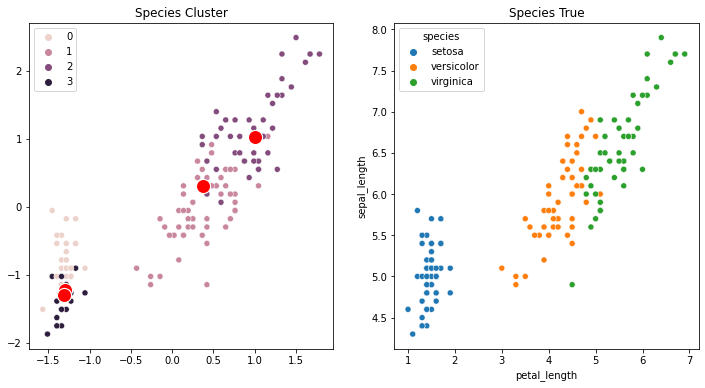

In [ ]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=1)
X = df.drop('species', axis=1)
y = df['species']
X_scaled = scaler.fit_transform(X)
kmeans.fit(X_scaled)
cats = kmeans.predict(X_scaled)
df['kmeans'] = cats

a,b,c,d = 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
centers = kmeans.cluster_centers_

X_center = centers[:,2]
y_center = centers[:,3]


f, axes = plt.subplots(1, 2, figsize=(12, 6))
#sns.scatterplot(data=df, x=, y=a, hue='kmeans', ax=axes[0]).set_title('Species Cluster')
sns.scatterplot(x= X_scaled[:,2], y=X_scaled[:,0], hue=kmeans.labels_, ax=axes[0]).set_title('Species Cluster')
sns.scatterplot(x=X_center, y=y_center, s=200, marker="o", ax=axes[0], color='r')

sns.scatterplot(data=df, x=c, y=a, hue='species', ax=axes[1]).set_title('Species True')
plt.show()

##Evaluate your model using the Elbow method, between 2 and 10 clusters, which cluster number seems optimal?

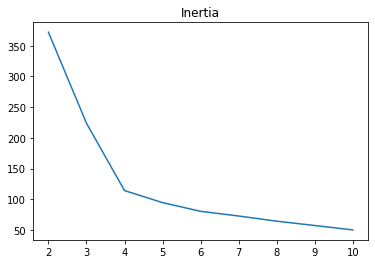

In [ ]:
k_inertia = [[], []]

scaler = StandardScaler()
X = df.drop('species', axis=1)
y = df['species']
X_scaled = scaler.fit_transform(X)

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=1)
  kmeans.fit(X_scaled)
  inertia = kmeans.inertia_
  k_inertia[0].append(i)
  k_inertia[1].append(inertia)

sns.lineplot(x=k_inertia[0], y=k_inertia[1]).set_title('Inertia')
plt.show()

4 clusters (possibly 5) seems optimal and fits the actuial data

##Evaluate your model using the Silhouette method, between 2 and 10 clusters, which cluster number seems optimal?


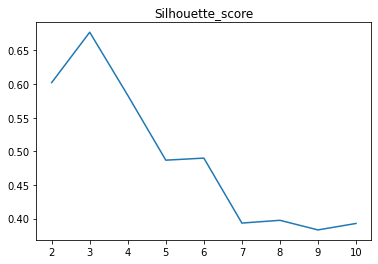

In [ ]:
k_silhouette = [[], []]

scaler = StandardScaler()
X = df.drop('species', axis=1)
y = df['species']
X_scaled = scaler.fit_transform(X)

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=1)
  kmeans.fit(X_scaled)
  k_silhouette[0].append(i)
  k_silhouette[1].append(silhouette_score(X, kmeans.labels_))
  


sns.lineplot(x=k_inertia[0], y=k_inertia[1]).set_title('Silhouette_score')
plt.show()